<a href="https://colab.research.google.com/github/marjansherafati/tensorflow-for-fashion-MNIST-classification/blob/master/Improving_Fashion_MNIST_classification_using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving fashion MNIST classification using Convolutions

In the previous exercise (simple tensorflow neural net for fashion MNIST classification), I simply used a flatten layer, a relu layer and an output Softmax layer.

I got an accuracy of 0.89 for the training set, and 0.87 for the test set

In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5020 - acc: 0.8236
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3753 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3355 - acc: 0.8786
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3130 - acc: 0.8853
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.3547 - acc: 0.8743



In this exercise, I want to start using convolution and max pool layers and see if I can increase the accuracy of training by adding convolution

in the cell below, I first reshape the input to make it suitable for the convolution layers (change it from a list of 60000 vectors, each 28*28, to a 60000 by 28 by 28 by 1 tensor!

Next I apply two convolution and two max pooling layers.

The rest of the code from here looks the same as the simple neural net I created previously

In [14]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


1.14.0
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_21 (Dense)             (None, 10)       

Accuracy has gone up to 91% on the validation data, which is a significant improvement in the right direction.

I can run the model for more epochs, say 20. Doing that, we can see that the accuracy on the test set does not necessarily improve with more epochs, due to overfitting.

In [15]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=20)
test_loss = model.evaluate(test_images, test_labels)

1.14.0
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_23 (Dense)             (None, 10)       

# Visualizing the Convolutions and Pooling

Let's look at some outputs from the convolution layers, as I want to visuallly understand what features did convolution find for each class.

The below code will show me the labels of the first 100 test examples. I can see that the labels at index 0, 23 and 28 are all the same (9, which was a shoe).

I will then apply a convolution layer to these inputs and visualize the output. This way we can see the features that the convolution layer isolated for the class "shoe"

In [16]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


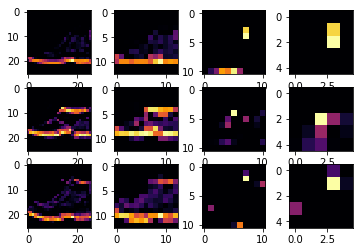

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Tuning the neural net parameters

First, I will change the number of convolution filter from 32 to 16 and 64 to see the impact on the accuracy and runtime

 Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.


In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_25 (Dense)             (None, 10)       

In [21]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_31 (Dense)             (None, 10)       

Next, I repeated the training with only one convolution layer and deleted the second convolution layer


In [22]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Epoch 1/5
60000/60000 [==============================] - 36s 608us/sample - loss: 0.1483 - acc: 0.9554
Epoch 2/5
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0519 - acc: 0.9840
Epoch 3/5
60000/60000 [==============================] - 36s 598us/sample - loss: 0.0331 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 36s 594us/sample - loss: 0.0218 - acc: 0.9931
Epoch 5/5
10000/10000 [==============================] - 2s 228us/sample - loss: 0.0733 - acc: 0.9782
0.9782


Next, let's add more convolution layers and see how that affects the accuracy and loss

In [23]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Epoch 1/5
60000/60000 [==============================] - 47s 775us/sample - loss: 0.2621 - acc: 0.9195
Epoch 2/5
60000/60000 [==============================] - 46s 772us/sample - loss: 0.0958 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 46s 773us/sample - loss: 0.0721 - acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 46s 775us/sample - loss: 0.0593 - acc: 0.9816
Epoch 5/5
10000/10000 [==============================] - 3s 267us/sample - loss: 0.0615 - acc: 0.9820
0.982


Finally, let's implement a callback function to stop training once we reach the desired accuracy.

In [24]:

import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Epoch 1/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.1514 - acc: 0.9544
Reached 95% accuracy so cancelling training!
10000/10000 [==============================] - 3s 286us/sample - loss: 0.0704 - acc: 0.9761
0.9761
